In [1]:
!pip install lifelines

     |████████████████████████████████| 348 kB 419 kB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.6 MB/s eta 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=f9733907cd1a96f3485cd0604dd91a9699e604ff4f525127bb03491fb1678a9a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [3]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("../input/survival123/survival_unemployment (1).csv")

In [4]:
survival_unemp.head()
survival_unemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [5]:
survival_unemp.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [6]:
survival_unemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [7]:
# Spell is referring to time 
T = survival_unemp.spell

In [8]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

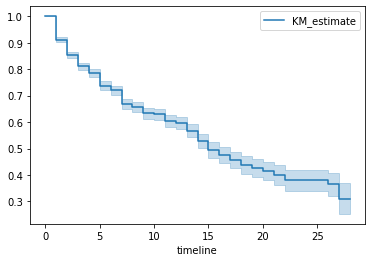

In [9]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T,event_observed=survival_unemp.event)
# Time-line estimations plot 
kmf.plot()

In [10]:
# Over Multiple groups 
# For each group, here group is ui
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

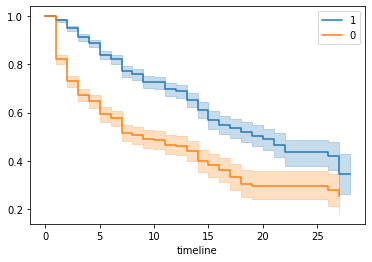

In [11]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)
